In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))


C:\Users\RONALD\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
C:\Users\RONALD\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [4]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [6]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/RONALD/Desktop/IMS-Classroom/Python Code/CR-Deep Learning/Cat_dog_data/TensorFlow/CAT_DOG/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Users/RONALD/Desktop/IMS-Classroom/Python Code/CR-Deep Learning/Cat_dog_data/TensorFlow/CAT_DOG/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [8]:
import warnings 
warnings.filterwarnings("ignore")

In [9]:
result=classifier.fit_generator(training_set,
                         epochs=100,
                         validation_data = test_set)

Epoch 1/100
250/250 [==============================] - 665s 3s/step - loss: 0.6718 - accuracy: 0.5878 - val_loss: 0.6361 - val_accuracy: 0.6795
Epoch 2/100
250/250 [==============================] - 448s 2s/step - loss: 0.5970 - accuracy: 0.6809 - val_loss: 0.4933 - val_accuracy: 0.6895
Epoch 3/100
250/250 [==============================] - 226s 902ms/step - loss: 0.5586 - accuracy: 0.7091 - val_loss: 0.5766 - val_accuracy: 0.7320
Epoch 4/100
250/250 [==============================] - 199s 798ms/step - loss: 0.5377 - accuracy: 0.7261 - val_loss: 0.6787 - val_accuracy: 0.7375
Epoch 5/100
250/250 [==============================] - 263s 1s/step - loss: 0.5068 - accuracy: 0.7461 - val_loss: 0.4417 - val_accuracy: 0.7535
Epoch 6/100
250/250 [==============================] - 282s 1s/step - loss: 0.4919 - accuracy: 0.7576 - val_loss: 0.4248 - val_accuracy: 0.7675
Epoch 7/100
250/250 [==============================] - 289s 1s/step - loss: 0.4737 - accuracy: 0.7732 - val_loss: 0.5938 - val_acc

In [10]:
classifier.save('cat_dog_classifier.h5')

In [11]:
from  keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline


In [12]:
model=load_model("cat_dog_classifier.h5")

In [13]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255
    prediction= model.predict_classes(raw_img)[0][0]
    accuracy = model.predict(raw_img)[0][0]
    plt.imshow(cv2.imread(path))
    print('Accuracy',accuracy)
    if prediction:
        print("its a dog")
    else:
        print("its a cat")

In [15]:
import os
os.getcwd()

'C:\\Users\\RONALD\\Desktop\\IMS-Classroom\\Python Code\\CR-Deep Learning'

Accuracy 3.8540433e-19
its a cat


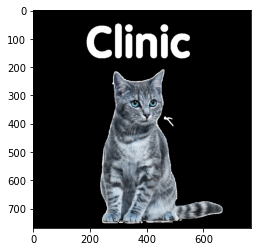

In [16]:
model_output("demo.jpg")

Accuracy 0.00021605115
its a cat


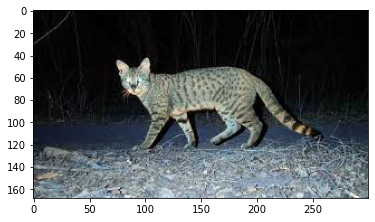

In [17]:
model_output("demo2.jpg")

In [ ]:
#model_output("cat.4022.jpg")

Accuracy 0.005583776
its a cat


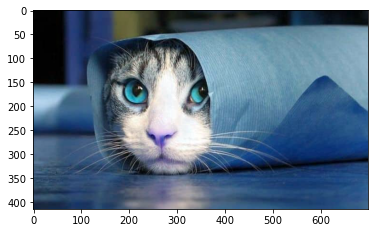

In [18]:
model_output('demo3.jpg')

Accuracy 0.9999995
its a dog


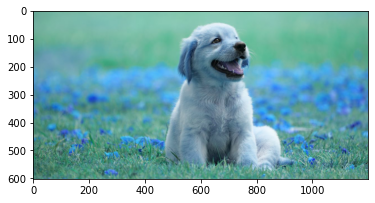

In [19]:
model_output('demo4.jpg')

Accuracy 0.26353988
its a cat


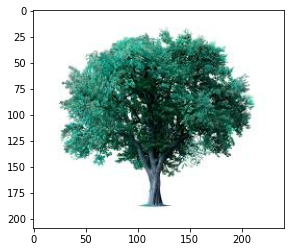

In [20]:
model_output('demo5.jpg')